In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import scale

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/yelp_dataset (1)/FakeNewsData.csv")

In [7]:
df.drop(['Unnamed: 0'],axis = 1,inplace  = True)

In [8]:
df

,text,Analytic,Authentic,Tone,WPS,Sixltr,number,quant,posemo,negemo,tentat,certain,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,target,FREScore
0,WASHINGTON (Reuters) - The head of a conservat...,97.02,22.27,35.07,23.41,28.44,2.80,1.34,1.60,1.07,1.20,0.27,1.20,5.87,0.80,0.93,4.01,6.81,2.00,1,42.04
1,WASHINGTON (Reuters) - Transgender people will...,96.86,13.98,49.52,20.23,32.85,2.39,1.28,2.71,1.44,0.96,0.48,0.96,8.61,0.80,1.12,3.83,5.10,2.07,1,32.57
2,WASHINGTON (Reuters) - The special counsel inv...,94.73,16.26,29.43,24.05,27.35,0.88,1.75,1.09,0.88,3.94,0.66,0.66,6.13,0.44,0.00,5.47,5.47,1.97,1,39.91
3,WASHINGTON (Reuters) - Trump campaign adviser ...,96.40,12.12,55.62,22.29,32.19,2.11,0.53,2.11,0.53,1.32,0.26,1.32,6.60,0.53,0.00,6.33,3.43,0.53,1,45.49
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,96.29,22.73,15.88,22.05,27.21,4.19,3.14,1.16,1.86,0.93,0.81,0.81,3.60,0.70,0.93,3.49,5.47,0.23,1,50.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44873,21st Century Wire says As 21WIRE reported earl...,96.34,16.74,46.26,49.00,28.01,1.11,2.04,3.90,2.78,2.60,0.93,0.74,3.15,0.93,0.37,5.19,3.71,0.37,0,22.35
44874,21st Century Wire says It s a familiar theme. ...,94.03,14.89,56.75,27.73,19.02,3.28,1.97,2.95,1.31,1.97,0.33,2.30,5.57,2.30,0.33,3.93,6.23,0.98,0,51.41
44875,Patrick Henningsen 21st Century WireRemember ...,90.88,33.24,22.15,38.88,22.66,1.59,1.99,2.48,2.71,2.22,1.54,1.68,4.68,0.77,1.03,2.83,5.94,1.52,0,28.24
44876,21st Century Wire says Al Jazeera America will...,91.99,25.14,49.16,47.70,20.34,4.40,2.31,2.52,1.26,1.05,2.10,2.10,3.14,1.68,1.05,3.77,7.13,0.84,0,27.16


## **Printing the features obtained from LIWC**
Note- FREScore is readability score obtained using sklearn

In [9]:
df.columns

Index(['text', 'Analytic', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'number',
       'quant', 'posemo', 'negemo', 'tentat', 'certain', 'achieve', 'power',
       'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture', 'target',
       'FREScore'],
      dtype='object')

Predictor variable (0 if news is fake ,1 if news is real)

In [10]:
y = df['target']

Only keeping the Numerical Values Columns obtained from LIWC

In [11]:
X = df.drop(['text','target'],axis = 1)

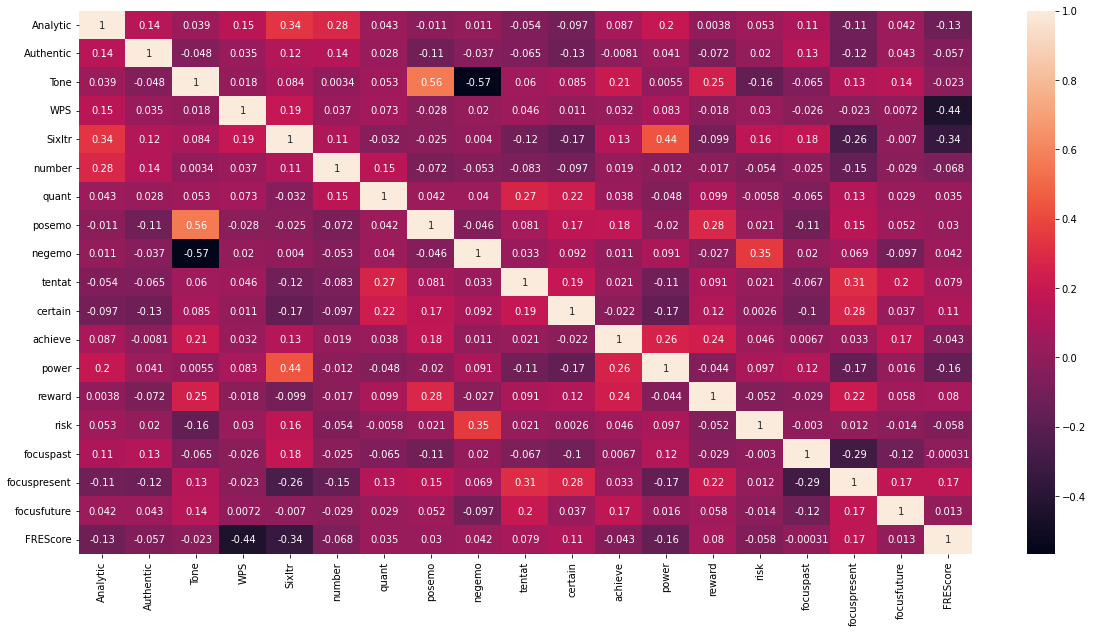

In [28]:
# Let's see the correlation matrix 

plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X.corr(),annot = True)

In [12]:
from sklearn.model_selection import train_test_split

Normalising the values of features

In [13]:
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
X = X.apply(normalize) 

In [14]:

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(X)


In [15]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31414, 19)
(31414,)
(13464, 19)
(13464,)


**Model Building**

In [18]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [19]:
predicted = model.predict(X_test)

In [20]:
print(metrics.confusion_matrix(y_test, predicted))

[[6327  730]
 [ 569 5838]]


In [21]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7057
           1       0.89      0.91      0.90      6407

    accuracy                           0.90     13464
   macro avg       0.90      0.90      0.90     13464
weighted avg       0.90      0.90      0.90     13464



In [22]:
print(model.score(X_test,y_test))

0.9035204991087344


**Feature Importance**

In [23]:
from matplotlib import pyplot

In [24]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    print('Feature: %s, Score: %.5f' % (feature,importance)) #add the name/value pair 

Feature: Analytic, Score: 0.28037
Feature: Authentic, Score: 0.02999
Feature: Tone, Score: 0.01616
Feature: WPS, Score: 0.08011
Feature: Sixltr, Score: 0.13580
Feature: number, Score: 0.02910
Feature: quant, Score: 0.06972
Feature: posemo, Score: 0.00729
Feature: negemo, Score: 0.01988
Feature: tentat, Score: 0.03163
Feature: certain, Score: 0.06949
Feature: achieve, Score: 0.03174
Feature: power, Score: 0.03996
Feature: reward, Score: 0.02159
Feature: risk, Score: 0.01274
Feature: focuspast, Score: 0.04637
Feature: focuspresent, Score: 0.01136
Feature: focusfuture, Score: 0.02749
Feature: FREScore, Score: 0.03920


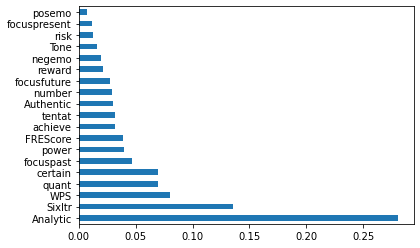

In [25]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

Obtaining p-score of various features

In [29]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                31414
Model:                            GLM   Df Residuals:                    31394
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 11 Jan 2022   Deviance:                          inf
Time:                        12:05:47   Pearson chi2:                 9.01e+15
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           61.9802      2.607     23.777      0.000      56.871      67.089
Analytic       290.1541     12.327     23.538      0.000     265.994     314.314
Authentic        2.6173      0.109     24.023      0.000       2.404       2.831
Tone             1.0497      0.137      7.677      0.000       0.782       1.318
WPS            -63.2845      1.025    -61.744      0.000     -65.293     -61.276
Sixltr          15.7734      0.439     35.936      0.000      14.913      16.634
number          -6.8768      0.762     -9.028      0.000      -8.370      -5.384
quant            5.6286      0.559     10.063      0.000       4.532       6.725
posemo         -15.8787      1.830     -8.679      0.000     -19.465     -12.293
negemo         -12.2239      0.957    -12.773      0.000     -14.100     -10.348
tentat          -3.5009      0.425     -8.246      0.000      -4.333      -2.669
certain        -22.5941      0.813    -27.795      0.000     -24.187     -21.001
achieve         15.6074      1.155     13.515      0.000      13.344      17.871
power           11.4678      0.422     27.166      0.000      10.640      12.295
reward          -9.9033      1.171     -8.458      0.000     -12.198      -7.608
risk            21.7145      1.218     17.832      0.000      19.328      24.101
focuspast       10.8452      0.261     41.571      0.000      10.334      11.357
focuspresent    -9.2040      0.904    -10.184      0.000     -10.975      -7.433
focusfuture     15.0135      0.526     28.550      0.000      13.983      16.044
FREScore       -71.8206      2.602    -27.602      0.000     -76.920     -66.721
================================================================================
"""

In [30]:
fit = sm.OLS(y, X).fit()
print(fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.729
Model:                            OLS   Adj. R-squared (uncentered):              0.729
Method:                 Least Squares   F-statistic:                              6344.
Date:                Tue, 11 Jan 2022   Prob (F-statistic):                        0.00
Time:                        11:30:55   Log-Likelihood:                         -17802.
No. Observations:               44878   AIC:                                  3.564e+04
Df Residuals:                   44859   BIC:                                  3.581e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

## **Hyperparameter Tuning**

In [ ]:

param_grid = {
    'max_depth': [5,8,10],
    'n_estimators': [50,100,150,],
    'learning_rate': [0.1, 0.01, 0.05],
    'subsample': [ 0.6, 1]
}

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 10

# specify range of hyperparameters
#param_grid = {'learning_rate': [0.1,0.5], 
             #'subsample': [ 0.6, 1]}          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid,                          
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)   

In [ ]:
# fit the model
model_cv.fit(X_train, y_train)  

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 79.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [5, 8, 10],
                         'n_estimators': [50, 100, 150],
        

In [ ]:

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,2.587727,0.049830,0.012292,0.000856,0.1,5,50,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.913113,0.907384,0.914067,0.919796,0.909901,0.907036,0.913085,0.901942,0.913403,0.906399,0.910613,0.004828,36,0.924484,0.922998,0.922750,0.922892,0.922258,0.923142,0.923001,0.923708,0.922187,0.924981,0.923240,0.000858
1,2.222049,0.018294,0.011827,0.000087,0.1,5,50,1,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.909612,0.907702,0.914704,0.917250,0.909901,0.907673,0.908309,0.901624,0.910538,0.905444,0.909276,0.004176,37,0.925368,0.924590,0.923529,0.923741,0.924133,0.924380,0.923991,0.924026,0.923461,0.925441,0.924266,0.000658
2,4.961192,0.020051,0.021325,0.000246,0.1,5,100,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.915977,0.918523,0.922979,0.928071,0.921363,0.921044,0.917861,0.914358,0.921999,0.914358,0.919653,0.004079,24,0.938632,0.936863,0.937146,0.936580,0.937255,0.938599,0.938210,0.938599,0.937538,0.939200,0.937862,0.000849
3,4.270570,0.033783,0.021544,0.001028,0.1,5,100,1,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.917887,0.918205,0.922024,0.926798,0.921999,0.917224,0.914040,0.913403,0.918497,0.914040,0.918412,0.004016,26,0.939375,0.940153,0.938667,0.938137,0.938599,0.938705,0.938493,0.939660,0.939094,0.940438,0.939132,0.000719
4,7.240818,0.021867,0.030830,0.001285,0.1,5,150,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.919478,0.920751,0.924252,0.932209,0.923273,0.923591,0.923273,0.916905,0.925820,0.919134,0.922869,0.004052,17,0.946307,0.946555,0.946626,0.947156,0.946521,0.947689,0.946910,0.947618,0.946486,0.948042,0.946991,0.000573
5,6.139449,0.024851,0.030259,0.000930,0.1,5,150,1,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.918842,0.919796,0.922661,0.930617,0.923273,0.920408,0.918816,0.916905,0.923910,0.917861,0.921309,0.003818,20,0.947121,0.947333,0.946909,0.947156,0.947830,0.946804,0.947547,0.947936,0.947865,0.948396,0.947490,0.000486
6,4.769385,0.018682,0.017957,0.000202,0.1,8,50,0.6,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.919160,0.922024,0.925843,0.928071,0.920089,0.921044,0.920408,0.914040,0.920408,0.914995,0.920608,0.004030,23,0.958298,0.956883,0.959147,0.957520,0.957734,0.958370,0.957451,0.957486,0.956602,0.958158,0.957765,0.000713
7,4.437964,0.029723,0.017698,0.000182,0.1,8,50,1,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.921706,0.920751,0.923934,0.927753,0.920408,0.919134,0.921044,0.914677,0.925183,0.915314,0.920990,0.003853,21,0.964276,0.965160,0.964205,0.963780,0.963676,0.963393,0.963711,0.963004,0.963676,0.963852,0.963873,0.000550
8,9.079178,0.053835,0.033599,0.000849,0.1,8,100,0.6,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.926162,0.929981,0.935710,0.936346,0.927730,0.925501,0.929004,0.927730,0.928685,0.923910,0.929076,0.003866,9,0.979202,0.978282,0.977787,0.977257,0.978601,0.978389,0.979026,0.977576,0.977505,0.978495,0.978212,0.000625
9,8.168818,0.082902,0.033274,0.000835,0.1,8,100,1,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.925207,0.926798,0.934437,0.935391,0.931869,0.928685,0.927730,0.922954,0.931869,0.922636,0.928758,0.004293,10,0.981926,0.982315,0.979202,0.981324,0.981785,0.979203,0.980688,0.979663,0.979592,0.981749,0.980745,0.001164


In [ ]:
model_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150, 'subsample': 1}

In [ ]:
# chosen hyperparameters

params = {'learning_rate': 0.1,
           'max_depth': 10,
          'subsample':1,
          'n_estimators': 150
         }

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.1, 'max_depth': 10,
                      'n_estimators': 150, 'subsample': 1},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[6327  730]
 [ 569 5838]]


In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7057
           1       0.89      0.91      0.90      6407

    accuracy                           0.90     13464
   macro avg       0.90      0.90      0.90     13464
weighted avg       0.90      0.90      0.90     13464



In [ ]:
print(model.score(X_test,y_test))

0.9035204991087344
